In [25]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
# path= r"C:\Users\USER\Desktop\Images for animal detection"
# path_img = list(glob.glob(path+'/**/*.jpeg'))

path= r"C:\Users\USER\Desktop\Images for animal detection"
path_img = len(glob.glob(path+'/**/*.jpeg'))

In [27]:
# labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1], path_img))
# file_path = pd.Series(path_img, name='File_Path').astype(str)
# labels = pd.Series(labels, name='Labels')
# data = pd.concat([file_path, labels], axis=1)
# data = data.sample(frac=1).reset_index(drop=True)
# data.head()


path = r"C:\Users\USER\Desktop\Images for animal detection"
path_img = list(glob.glob(path + '/**/*.jpeg',recursive = True))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], path_img))
file_path = pd.Series(path_img, name='File_Path').astype(str)
labels = pd.Series(labels, name='Labels')
data = pd.concat([file_path, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,File_Path,Labels
0,C:\Users\USER\Desktop\Images for animal detect...,healthy_cow
1,C:\Users\USER\Desktop\Images for animal detect...,healthy_cow
2,C:\Users\USER\Desktop\Images for animal detect...,healthy_poultry_chicken
3,C:\Users\USER\Desktop\Images for animal detect...,healthy_pig
4,C:\Users\USER\Desktop\Images for animal detect...,healthy_cow


In [28]:
# pip install opencv-python

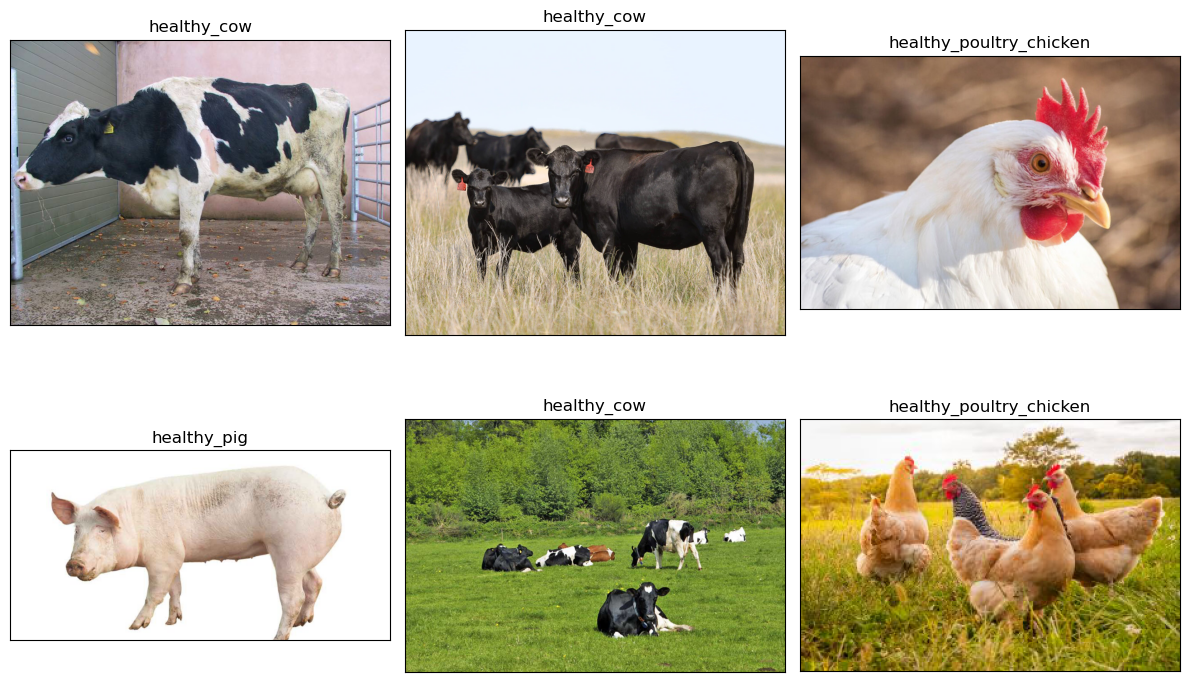

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.File_Path[i]))
    ax.set_title(data.Labels[i])
plt.tight_layout()
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'healthy_goat'),
  Text(1, 0, 'healthy_pig'),
  Text(2, 0, 'healthy_cow'),
  Text(3, 0, 'healthy_poultry_chicken')])

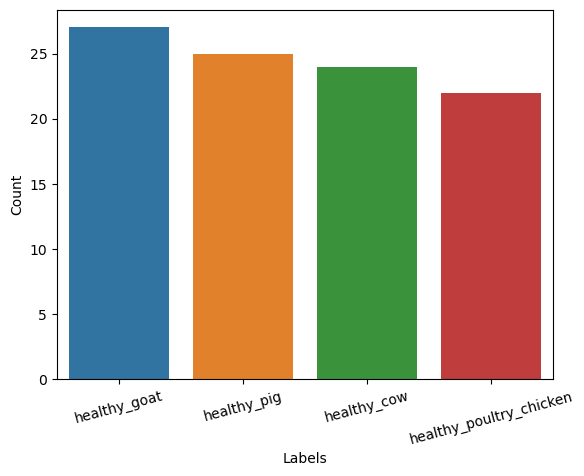

In [30]:
counts=data.Labels.value_counts()
sns.barplot(x=counts.index,y=counts)
plt.xlabel("Labels")
plt.ylabel("Count")
plt.xticks(rotation=15)

In [31]:
# train_df, test_df = train_test_split(data, test_size=0.1, random_state=1)

In [32]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

train_data.head()
val_data.head()
test_data.head()

,File_Path,Labels
62,C:\Users\USER\Desktop\Images for animal detect...,healthy_goat
40,C:\Users\USER\Desktop\Images for animal detect...,healthy_pig
94,C:\Users\USER\Desktop\Images for animal detect...,healthy_goat
18,C:\Users\USER\Desktop\Images for animal detect...,healthy_goat
81,C:\Users\USER\Desktop\Images for animal detect...,healthy_pig


In [33]:
train_data.head()

,File_Path,Labels
63,C:\Users\USER\Desktop\Images for animal detect...,healthy_pig
14,C:\Users\USER\Desktop\Images for animal detect...,healthy_poultry_chicken
32,C:\Users\USER\Desktop\Images for animal detect...,healthy_cow
50,C:\Users\USER\Desktop\Images for animal detect...,healthy_cow
86,C:\Users\USER\Desktop\Images for animal detect...,healthy_pig


In [34]:
val_data.head()

,File_Path,Labels
23,C:\Users\USER\Desktop\Images for animal detect...,healthy_goat
31,C:\Users\USER\Desktop\Images for animal detect...,healthy_pig
69,C:\Users\USER\Desktop\Images for animal detect...,healthy_poultry_chicken
28,C:\Users\USER\Desktop\Images for animal detect...,healthy_cow
68,C:\Users\USER\Desktop\Images for animal detect...,healthy_goat


In [35]:
test_data.head()

,File_Path,Labels
62,C:\Users\USER\Desktop\Images for animal detect...,healthy_goat
40,C:\Users\USER\Desktop\Images for animal detect...,healthy_pig
94,C:\Users\USER\Desktop\Images for animal detect...,healthy_goat
18,C:\Users\USER\Desktop\Images for animal detect...,healthy_goat
81,C:\Users\USER\Desktop\Images for animal detect...,healthy_pig


In [36]:
# IMAGE_SHAPE = (224, 224)
# TRAINING_DATA_DIR = str(path)
# print(TRAINING_DATA_DIR);
# datagen_kwargs = dict(rescale=1./255, validation_split=.20)
# valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
# valid_generator = valid_datagen.flow_from_directory(
# TRAINING_DATA_DIR,
# subset="validation",
# shuffle=True,
# target_size=IMAGE_SHAPE
# )
# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
# train_generator = train_datagen.flow_from_directory(
# TRAINING_DATA_DIR,
# subset="training",
# shuffle=True,
# target_size=IMAGE_SHAPE)

In [37]:
# image_batch_train, label_batch_train = next(iter(train_generator))
# print("Image batch shape: ", image_batch_train.shape)
# print("Label batch shape: ", label_batch_train.shape)
# dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
# dataset_labels = np.array([key.title() for key, value in dataset_labels])
# print(dataset_labels)

In [38]:
# model = tf.keras.Sequential([
# tf.keras.layers.Dropout(0.4),
# tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
# ])
# model.build([None, 224, 224, 3])
# model.summary()
# model.compile(
# optimizer=tf.keras.optimizers.Adam(),
# loss='categorical_crossentropy',
# metrics=['acc'])

In [39]:
# steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
# val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
# hist = model.fit(
# train_generator,
# epochs=10,
# verbose=1,
# steps_per_epoch=steps_per_epoch,
# validation_data=valid_generator,
# validation_steps=val_steps_per_epoch).history

In [40]:
batch_size = 32
image_size = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_data,
    x_col='File_Path',
    y_col='Labels',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_dataframe(
    val_data,
    x_col='File_Path',
    y_col='Labels',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No need to shuffle validation data
)


Found 79 validated image filenames belonging to 4 classes.
Found 9 validated image filenames belonging to 4 classes.


In [41]:
num_classes = 4

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data
epochs = 50
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=epochs)

Epoch 1/50
3/3 [==============================] - 38s 8s/step - loss: 14.7860 - accuracy: 0.2785 - val_loss: 10.5833 - val_accuracy: 0.2222
Epoch 2/50
3/3 [==============================] - 27s 8s/step - loss: 7.1033 - accuracy: 0.2025 - val_loss: 1.7508 - val_accuracy: 0.4444
Epoch 3/50
3/3 [==============================] - 26s 11s/step - loss: 1.6451 - accuracy: 0.2278 - val_loss: 1.7111 - val_accuracy: 0.2222
Epoch 4/50
3/3 [==============================] - 20s 5s/step - loss: 1.4463 - accuracy: 0.3291 - val_loss: 1.4005 - val_accuracy: 0.2222
Epoch 5/50
3/3 [==============================] - 17s 5s/step - loss: 1.2888 - accuracy: 0.2532 - val_loss: 1.2812 - val_accuracy: 0.2222
Epoch 6/50
3/3 [==============================] - 23s 9s/step - loss: 1.2728 - accuracy: 0.3418 - val_loss: 1.3033 - val_accuracy: 0.4444
Epoch 7/50
3/3 [==============================] - 21s 8s/step - loss: 1.2677 - accuracy: 0.3671 - val_loss: 1.3697 - val_accuracy: 0.2222
Epoch 8/50
3/3 [===============

In [42]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    test_data,
    x_col='File_Path',
    y_col='Labels',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No need to shuffle test data
)

Found 10 validated image filenames belonging to 3 classes.


In [43]:
predictions = model.predict(test_generator, verbose=1)

1/1 [==============================] - 2s 2s/step


In [44]:
predictions

array([[9.97327089e-01, 2.18634401e-03, 1.66837594e-06, 4.84857184e-04],
       [1.40394613e-01, 1.68431967e-01, 6.75828636e-01, 1.53448209e-02],
       [5.52335441e-01, 1.95903435e-01, 2.37410918e-01, 1.43501740e-02],
       [5.06467462e-01, 4.93222028e-01, 2.70371209e-04, 4.01748330e-05],
       [4.68050912e-02, 7.28231132e-01, 1.74385741e-01, 5.05779833e-02],
       [4.09896858e-02, 9.59010184e-01, 8.85744527e-08, 2.62775117e-08],
       [1.41897835e-02, 1.11999083e-03, 8.79796684e-01, 1.04893535e-01],
       [6.07680023e-01, 3.04959249e-02, 3.50811571e-01, 1.10125234e-02],
       [9.18836117e-01, 5.56318555e-04, 1.47260085e-04, 8.04603696e-02],
       [8.01789105e-01, 1.97618678e-01, 3.17385420e-04, 2.74806225e-04]],
      dtype=float32)

In [45]:
true_labels = test_data['Labels'].to_numpy()
predicted_labels = predictions.argmax(axis=1)

In [1]:
# model.evaluate(test_generator)

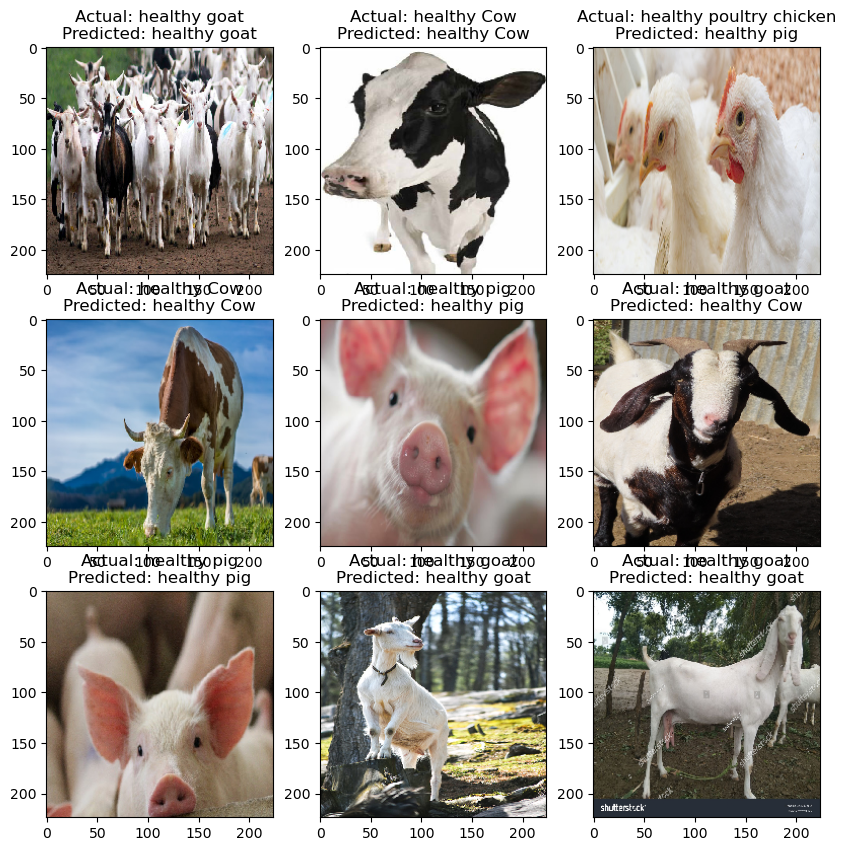

In [ ]:
plt.figure(figsize=(10, 10))
class_names = ['healthy Cow', 'healthy goat', 'healthy pig', 'healthy poultry chicken']

counter = 0

for images, labels in test_generator:
    classifications = model(images)
    
    # Loop through the batch of images
    for i in range(images.shape[0]):
        ax = plt.subplot(3, 3, counter + 1)
        plt.imshow(images[i])
        actual_label = class_names[np.argmax(labels[i])]  # Get the actual label
        predicted_label = class_names[np.argmax(classifications[i])] 
        plt.title("Actual: " + actual_label + "\nPredicted: " + predicted_label)
        
        counter += 1
        
        # Break the loop after displaying 9 images
        if counter >= 9:
            break
    
    # Break the outer loop after displaying 9 images
    if counter >= 9:
        break

plt.show()


In [ ]:
model.save('healthdetctionmodel.h5')

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
